Q1. Build a CNN to classify handwritten digits using the MNIST dataset.
a. Use Keras or PyTorch.
b. Plot accuracy and loss during training.
c. Visualize feature maps from the first convolutional layer of your CNN model.

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [ ]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data() #loads a dataset of 70,000 handwritten digit images, pre-packaged with Keras.

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x_train = X_train.astype("float32") / 255.0
x_test = X_test.astype("float32") / 255.0 # Normalize the pixel values from (0–255 → 0–1)

In [ ]:
from tensorflow.keras import layers,models

In [ ]:
#builidng the cnn model
model = models.Sequential([
    layers.Conv2D(32,(3,3), activation='relu',input_shape=(28,28,1),name="conv1"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 digits output
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

final_res_model  =model.fit(x_train,y_train,epochs=5,validation_split=0.5)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 33s 33ms/step - accuracy: 0.8636 - loss: 0.4616 - val_accuracy: 0.9763 - val_loss: 0.0740
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - accuracy: 0.9802 - loss: 0.0635 - val_accuracy: 0.9829 - val_loss: 0.0571
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 42s 34ms/step - accuracy: 0.9870 - loss: 0.0409 - val_accuracy: 0.9804 - val_loss: 0.0628
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 40s 33ms/step - accuracy: 0.9920 - loss: 0.0266 - val_accuracy: 0.9773 - val_loss: 0.0799
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 33s 35ms/step - accuracy: 0.9917 - loss: 0.0237 - val_accuracy: 0.9875 - val_loss: 0.0467


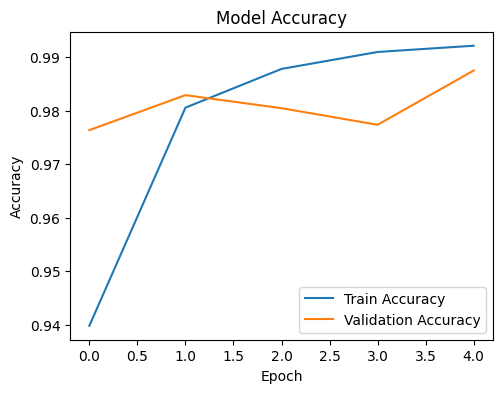

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(final_res_model.history['accuracy'], label='Train Accuracy')
plt.plot(final_res_model.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

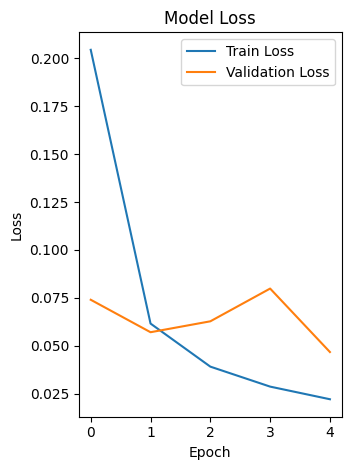

In [ ]:
plt.subplot(1, 2, 1)
plt.plot(final_res_model.history['loss'], label='Train Loss')
plt.plot(final_res_model.history['val_loss'], label='Validation Loss')
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Create a new model that outputs the feature maps of the first conv layer
feature_model = models.Model(inputs=model.inputs, outputs=model.get_layer("conv1").output)


# Select an image from the test set
test_img = x_test[0].reshape(1, 28, 28, 1)

# Get feature maps
feature_maps = feature_model.predict(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(1, 28, 28, 1))
  warnings.warn(msg)


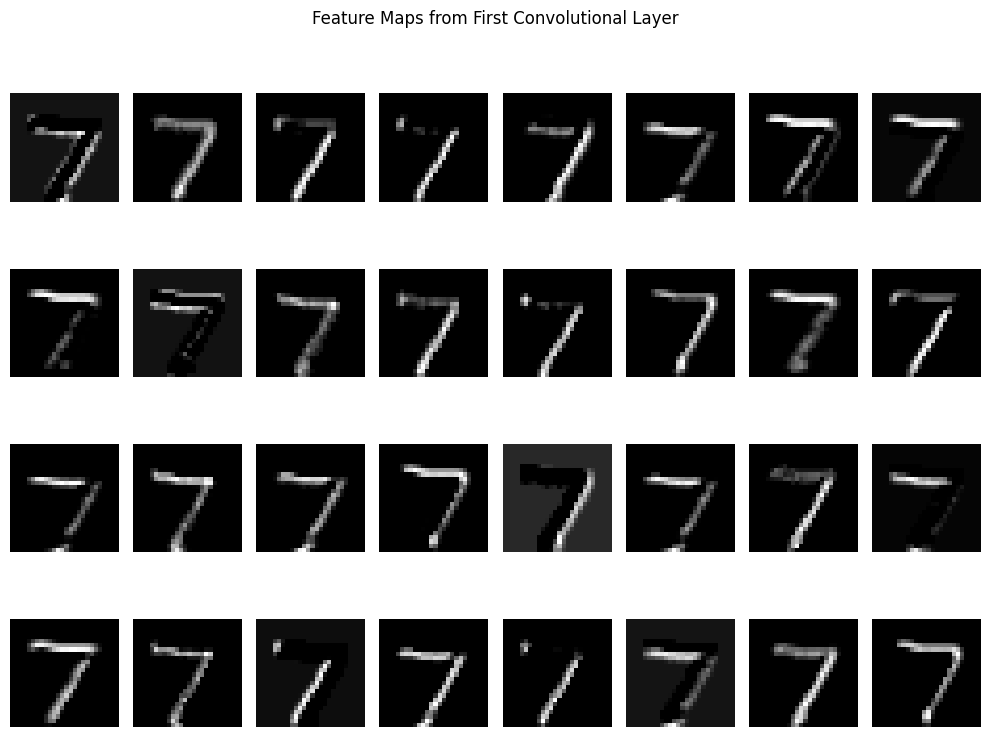

In [ ]:
# Plot feature maps
plt.figure(figsize=(10, 8))
for i in range(min(32, feature_maps.shape[-1])):  # Plot up to 32 filters
    plt.subplot(4, 8, i + 1)
    plt.imshow(feature_maps[0, :, :, i], cmap='gray')
    plt.axis('off')
plt.suptitle("Feature Maps from First Convolutional Layer")
plt.tight_layout()
plt.show()

Q2. Us e a convolutional filter to perform the following operation:
a. Blur the image.
b. Detect Edges
c. Sharpen the image
d. Gaussian Blur
e. Sobel filtering

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving img4.jpeg to img4.jpeg


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

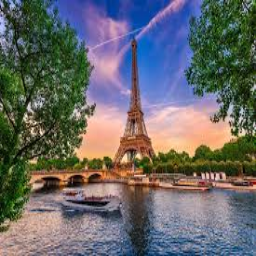

In [ ]:
from google.colab.patches import cv2_imshow
img = cv2.imread('img4.jpeg')
img = cv2.resize(img, (256, 256))

#showing the original image
cv2_imshow(img)

# Function to display images side-by-side
def show_img(title, img):
    plt.figure(figsize=(4, 4))
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

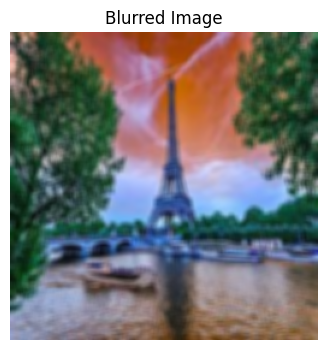

In [ ]:
# Simple averaging blur (box blur)
blur_kernel = np.ones((5, 5), np.float32) / 25
blurred = cv2.filter2D(img, -1, blur_kernel)

show_img("Blurred Image", blurred)


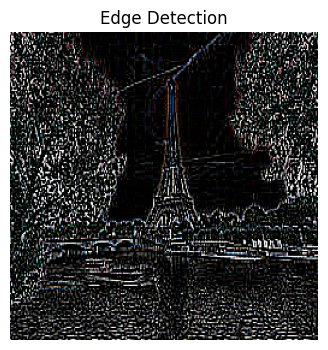

In [ ]:
# Simple edge detection kernel
edge_kernel = np.array([[-1, -1, -1],
                        [-1,  8, -1],
                        [-1, -1, -1]])
edges = cv2.filter2D(img, -1, edge_kernel)

show_img("Edge Detection", edges)

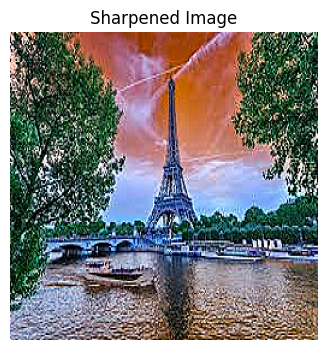

In [ ]:
# Sharpening kernel
sharpen_kernel = np.array([[ 0, -1,  0],
                           [-1,  5, -1],
                           [ 0, -1,  0]])
sharpened = cv2.filter2D(img, -1, sharpen_kernel)

show_img("Sharpened Image", sharpened)

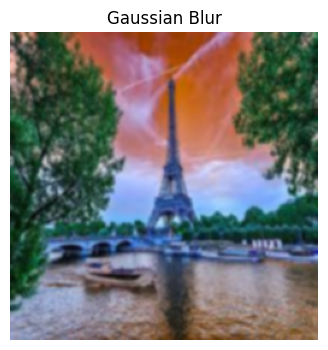

In [ ]:
# Gaussian blur using OpenCV's built-in function
gaussian_blur = cv2.GaussianBlur(img, (5, 5), sigmaX=0)

show_img("Gaussian Blur", gaussian_blur)

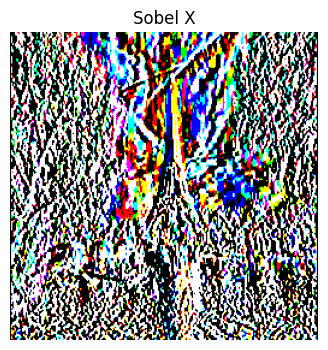

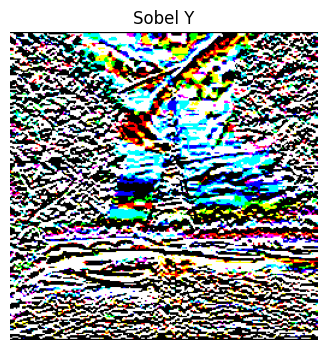

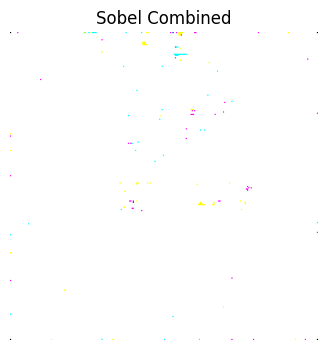

In [ ]:
# Sobel filters (X and Y directions)
sobel_x = cv2.Sobel(img, cv2.CV_64F, dx=1, dy=0, ksize=3)
sobel_y = cv2.Sobel(img, cv2.CV_64F, dx=0, dy=1, ksize=3)

# Combine gradients
sobel_combined = cv2.magnitude(sobel_x, sobel_y)

show_img("Sobel X", sobel_x)
show_img("Sobel Y", sobel_y)
show_img("Sobel Combined", sobel_combined)